## Módulo RVT vis

Para cargar el archivo DEM en una matriz numpy y almacenar visualizaciones en GeoTIFF, usaremos el módulo `rvt.default` (que se basa en la biblioteca gdal de python). También podemos usar `rasterio`, `gdal` o cualquier otra biblioteca de Python.

In [10]:
import rvt.vis  # para generar las visualizaciones
import rvt.default  # para abrir y guardar nuestro ráster
import numpy as np
import matplotlib.pyplot as plt  # para graficar nuestras visualizaciones.

En el directorio `raster` hay un archivo llamado **“hh_cut_final.tif”**, este será nuestro DEM de prueba, desde el cual estaremos calculando visualizaciones. Defina la cadena con la ruta a este archivo (input_dem_path).

El módulo `default` tiene la función `get_raster_arr ()` que lee el raster según la ruta indicada y devuelve un diccionario con las claves "array", "resolución" y "no_data". La clave "array" es un numpy array del ráster, la "resolución" es una tupla del tamaño de píxel donde el primer elemento es el tamaño de píxel en la dirección `x` y el segundo es en la dirección `y`, "no_data" es el valor que representa noData en el raster (array).

In [11]:
dem_path = r'raster/hh_cut_final.tif' # Definiendo la ruta de nuestro DEM
dict_dem = rvt.default.get_raster_arr(dem_path) # Genera un diccionario a partir del DEM
dem_arr = dict_dem["array"]  # nuestra matriz numpy del DEM
dem_resolution = dict_dem["resolution"]
dem_res_x = dem_resolution[0]  # resolución en la dirección X (0.5 para el ejemplo)
dem_res_y = dem_resolution[1]  # resolución en la dirección Y (0.5 para el ejemplo)
dem_no_data = dict_dem["no_data"] # definiendo los valores considerados "NoData"

#plt.imshow(dem_arr, cmap='terrain') # para graficar el DEM (usando Notebook de Jupyter)
# Los valores de cmap pueden consultarse en https://matplotlib.org/stable/tutorials/colors/colormaps.html

## Funciones de visualización

### 1. Pendiente - Aspecto

Para calcular la pendiente y el aspecto, utilice la función `rvt.vis.slope_aspect ()`. Los parámetros son: `dem`, `resolution_x`, `resolution_y`, `output_units` (puede ser: percent, degree, radianes), `ve_factor`, `no_data`, `fill_no_data`, `keep_original_no_data`. Nuestro DEM no tiene píxeles de datos (dem_no_data = None), por eso estableceremos fill_no_data y original_no_data en False. Salidas de función diccionario con las claves de “slope” y “aspect”. Cada clave contiene una numpy array.

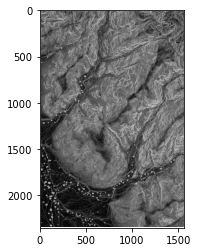

In [3]:
# Generando el diccionario para generar las visualizacions de pendiente y aspecto
dict_slope_aspect = rvt.vis.slope_aspect(dem=dem_arr, resolution_x=dem_res_x,resolution_y=dem_res_y,
                                         output_units="degree", ve_factor=1, no_data=dem_no_data,
                                         fill_no_data=False, keep_original_no_data=False)

slope_arr = dict_slope_aspect['slope']
aspect_arr = dict_slope_aspect['aspect']

# Para visualizar la pendiente
plt.imshow(slope_arr, cmap='gray')

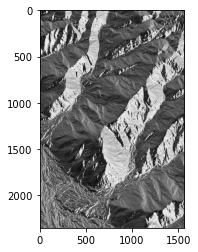

In [4]:
# Si queremos visualizar el aspecto
plt.imshow(aspect_arr, cmap='gray')

Para guardar la visualización, use `rvt.default.save_raster ()`. Esta función toma los parámetros `src_raster_path` (ruta dem para copiar geodatos), `out_raster_path` (ruta de visualización), `out_raster_arr` (matriz numérica de visualización), `no_data` (cómo no se almacenan datos, todas las visualizaciones no_data se almacenan como np.nan), `e_type` (GDALDataType, por ejemplo, 6 es para float32 y 1 es para uint8).

In [5]:
# Guardar la visualización de la pendiente
slope_path = r"outputs/hh_test_pendiente.tif" # ruta de nuestro resultado
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=slope_path, 
                        out_raster_arr=slope_arr, no_data=np.nan, e_type=6)

In [6]:
# Guardar la visualización del aspecto
aspect_path = r"outputs/hh_test_aspecto.tif" # ruta de nuestro resultado
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=aspect_path, 
                        out_raster_arr=aspect_arr, no_data=np.nan, e_type=6)

### 2. Hillshade

Para calcular el sombreado, use la función `rvt.vis.hillshade ()`. Los parámetros son: `dem`, ' `resolution_x`, `resolution_y`, `sun_azimuth`, `sun_elevation`, `ve_factor`, `no_data`, `fill_no_data`, `keep_original_no_data`. La función genera un numpy array de sombreado.


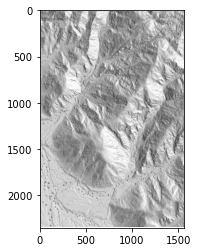

In [7]:
# Generar una visualización 'Hillshade'
sun_azimuth = 65 # ángulo del azimut solar (en el sentido de las agujas del reloj desde el norte) en grados 
sun_elevation = 45 # ángulo vertical solar (sobre el horizonte local del observador) en grados.
hillshade_arr = rvt.vis.hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y,
                                  sun_azimuth=sun_azimuth, sun_elevation=sun_elevation, ve_factor=1,
                                  no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(hillshade_arr, cmap='gray') # gráfica del hillshade 

In [8]:
# Guardar nuestro mapa de sombras
hillshade_path = r"outputs/hh_test_sombreado.tif" # ruta de salida de nuestro resultado
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=hillshade_path, 
                        out_raster_arr=hillshade_arr, no_data=np.nan, e_type=6)

### 3. Sombreado multidireccional

A diferencia de un sombreado predeterminado, el sombreado multidireccional presenta una vista incomparable de las montañas, mesetas, valles y cañones del mundo mediante el uso de un algoritmo que calcula el sombreado desde seis direcciones diferentes.

Para calcular el sombreado de múltiples direcciones, use la función `rvt.vis.multi_hillshade ()`. Los parámetros son: `dem`, `resolution_x`, `resolution_y`, `nr_directions`, `sun_elevation`, `ve_factor`, `no_data`, `fill_no_data`, `keep_original_no_data`. La función produce un numpy array 3D (donde la primera dimensión representa cada dirección (nr_directions), por ejemplo, arr`[0]` es la primera dirección).

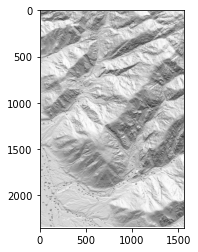

In [9]:
# Generar una visualización de sombreado multidireccional
nr_directions = 16  # número de direcciones que corresponde al número de ángulos de azimut solar (número de bandas)
sun_elevation = 45  # ángulo vertical solar (sobre el horizonte) en grados.
multi_hillshade_arr = rvt.vis.multi_hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y, 
                                              nr_directions=nr_directions, sun_elevation=sun_elevation,ve_factor=1,                                              no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

# gráfica de la primera dirección donde el azimut solar = 22,5 (360/16 = 22,5)
plt.imshow(multi_hillshade_arr[0], cmap='gray')  

Al guardar la matriz de sombreado de múltiples direcciones, cada dirección (azimut solar) se guardará en una banda.

In [10]:
# Guardar la visualización del sombreado multidireccional
multi_hillshade_path = r"outputs/hh_test_sombreado_multidireccional.tif" # ruta de nuestro resultado
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=multi_hillshade_path, 
                        out_raster_arr=multi_hillshade_arr, no_data=np.nan, e_type=6)

### 4. Modelo de Relieve Local Simple (SLRM) 

Los modelos de relieve locales mejoran la visibilidad de las características de la superficie a pequeña escala al eliminar los accidentes geográficos a gran escala del DEM.

Para calcular el modelo de relieve local simple, use la función `rvt.vis.slrm ()`. Los parámetros son: `dem`, `radius_cell`, `ve_factor`, `no_data`, `fill_no_data`, `keep_original_no_data`. La Función devuelve una gran variedad de modelos de relieve locales simples.

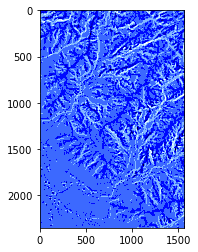

In [11]:
# Generar una visualización de modelo de relieve local simple 
radius_cell = 15 # radio a considerar en píxeles (no en metros)
slrm_arr = rvt.vis.slrm(dem=dem_arr, radius_cell=radius_cell, ve_factor=1, 
                        no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(slrm_arr, cmap='flag')

In [12]:
# Guardar el modelo de relieve local simple
local_relief_path = r"outputs/hh_test_relieve_local.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=local_relief_path, 
                        out_raster_arr=slrm_arr, no_data=np.nan, e_type=6)

### 5. Modelo de Relieve Multi-Escala (MSRM)

El Modelo de relieve multi-escala (MSRM - Multi-Scale Relief Model), es un nuevo algoritmo para la interpretación visual de accidentes geográficos utilizando DSM (Modelos de Superficie Digital).La importancia de este nuevo método radica en su capacidad para extraer la morfología del relieve de los DSM de alta y baja resolución, independientemente de la forma o escala del relieve en estudio.

Para calcular el modelo de relieve de múltiples escalas, utilice la función `rvt.vis.msrm ()`. Los parámetros son: `dem`, `resolution`, `feature_min`, `feature_max`, `scaling_factor`, `ve_factor`, `no_data`, `fill_no_data`, `keep_original_no_data`. La función devuelve una gran variedad de modelos de relieve de múltiples escalas.

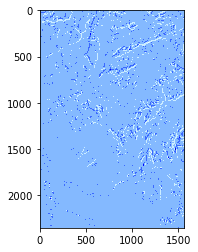

In [14]:
# Generar una visualización de Modelo de Relieve Multi-Escala
feature_min = 1 # Tamaño mínimo de la característica o razgo que desea detectar en metros.
feature_max = 5 # Tamaño máximo de la característica o razgo que desea detectar en metros.
scaling_factor = 3 # Factor de escala
msrm_arr = rvt.vis.msrm(dem=dem_arr, resolution=dem_res_x, feature_min=feature_min, 
                        feature_max=feature_max, scaling_factor=scaling_factor, ve_factor=1, 
                        no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(msrm_arr, cmap='flag')

In [15]:
# Guardar el modelo de relieve multi-scala
msrm_path = r"outputs/hh_test_relieve_multiescala.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=msrm_path, 
                        out_raster_arr=msrm_arr, no_data=np.nan, e_type=6)

### 6. Factor de Vista del Cielo (svf)

Es una nueva técnica de visualización en relieve basada en iluminación difusa, en lugar de directa. Utiliza el factor de vista del cielo, un parámetro que corresponde a la porción de cielo visible limitada por el relieve.

### 7. Factor de Vista del Cielo Anisotrópico (asvf)

El factor de vista del cielo anisotrópico asume que el cielo es más brillante en algunas direcciones que en otras.

### 8. Apertura (opns)

La apertura también es un sustituto de la iluminación difusa y se basa en una estimación de un ángulo medio de elevación del horizonte dentro de un radio de búsqueda definido. El valor medio de todos los ángulos cenitales da una **apertura positiva**, mientras que el valor medio del nadir da una **apertura negativa**.

In [3]:
# svf, parámetros del factor de vista del cielo que también se aplica para 'asvf' y 'opns'
svf_n_dir = 16  # número de direcciones
svf_r_max = 10  # radio de búsqueda máximo en píxeles
svf_noise = 0  # nivel de eliminación de ruido (0-no eliminar, 1-bajo, 2-medio, 3-alto)
# asvf, parámetros del svf anisotrópicos
asvf_level = 1  # nivel de anisotropía (1-bajo, 2-alto)
asvf_dir = 315  # dirección de anisotropía en grados

dict_svf = rvt.vis.sky_view_factor(dem=dem_arr, resolution=dem_res_x, compute_svf=True, 
                                   compute_asvf=True, compute_opns=True, svf_n_dir=svf_n_dir,
                                   svf_r_max=svf_r_max,svf_noise=svf_noise, asvf_level=asvf_level,
                                   asvf_dir=asvf_dir, no_data=dem_no_data, fill_no_data=False, 
                                   keep_original_no_data=False)
svf_arr = dict_svf["svf"]  # factor de vista del cielo
asvf_arr = dict_svf["asvf"]  # factor de vista del cielo anisotrópico
opns_arr = dict_svf["opns"]  # apertura positiva

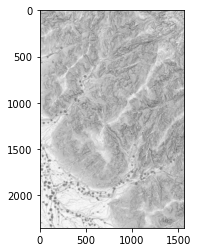

In [4]:
# Visualizando el svf
plt.imshow(svf_arr, cmap='gray')

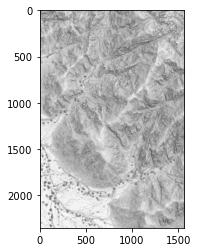

In [5]:
# Visualizando el asvf
plt.imshow(asvf_arr, cmap='gray')

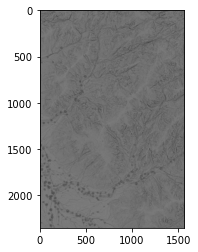

In [6]:
# Visualizando el apertura positiva 'opns'
plt.imshow(opns_arr, cmap="gray")

In [7]:
# Guardar los resultados
svf_path = r"outputs/hh_test_svf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=svf_path, 
                        out_raster_arr=svf_arr, no_data=np.nan, e_type=6)

asvf_path = r"outputs/hh_test_asvf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=asvf_path, 
                        out_raster_arr=asvf_arr, no_data=np.nan, e_type=6)

opns_path = r"outputs/hh_test_pos_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=opns_path, 
                        out_raster_arr=opns_arr, no_data=np.nan, e_type=6)

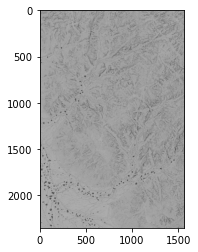

In [8]:
# Para la apertura negativa:
dem_arr_neg_opns = dem_arr * -1  # nuestro dem * -1 
# no necesitamos calcular svf y asvf (compute_svf = False, compute_asvf = False)
dict_svf2 = rvt.vis.sky_view_factor(dem=dem_arr_neg_opns, resolution=dem_res_x, 
                                    compute_svf=False, compute_asvf=False, 
                                    compute_opns=True, svf_n_dir=svf_n_dir, 
                                    svf_r_max=svf_r_max, svf_noise=svf_noise, 
                                    no_data=dem_no_data, fill_no_data=False, 
                                    keep_original_no_data=False)
neg_opns_arr = dict_svf2["opns"]

plt.imshow(neg_opns_arr, cmap='gray')

In [9]:
# Guardar los resultados
neg_opns_path = r"outputs/hh_test_neg_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=neg_opns_path, 
                        out_raster_arr=neg_opns_arr, no_data=np.nan, e_type=6)

### 9. Dominancia Local

La visualización del dominio local de un DEM se basa en calcular, para cada píxel del DEM, qué tan dominante sería un observador parado en ese punto para un área circundante local.


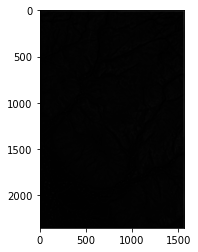

In [12]:
# Parámetros de Dominancia Local
min_rad = 10 # mínima distancia radial
max_rad = 20 # máxima distancia radial
rad_inc = 1  # pasos de distancia radial en píxeles
angular_res = 15 # paso angular para determinar el número de direcciones angulares
observer_height = 1.7  # altura a la que observamos el terreno
local_dom_arr = rvt.vis.local_dominance(dem=dem_arr, min_rad=min_rad, max_rad=max_rad, 
                                        rad_inc=rad_inc, angular_res=angular_res, 
                                        observer_height=observer_height, ve_factor=1, 
                                        no_data=dem_no_data, fill_no_data=False, 
                                        keep_original_no_data=False)

plt.imshow(local_dom_arr, cmap='gray')

In [ ]:
# Guardar los resultados
local_dom_path = r"outputs/hh_test_dominancia_local.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=local_dom_path,
                        out_raster_arr=local_dom_arr, no_data=np.nan, e_type=6)

### 10. Iluminación del Cielo

Los modelos de iluminación del cielo representan cuantitativamente la luminancia natural del cielo en diversas condiciones atmosféricas. Se implementan modelos de cielo uniforme y nublado, ya que ambos ignoran los efectos de sombreado direccional.

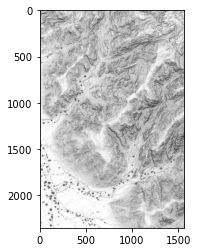

In [13]:
# Parámetros de iluminación de cielo
sky_model = "overcast"  # modelo de cielo nublado, puede ser también "uniform" 
max_fine_radius = 100 # distancia máxima de modelado de sombras en píxeles
num_directions = 32 # direcciones para buscar horizonte
compute_shadow = True # si es True, agrega sombreado
shadow_az = 315 # azimut de sombra
shadow_el = 35 # elevación de sombra
sky_illum_arr = rvt.vis.sky_illumination(dem=dem_arr, resolution=dem_res_x, 
                                         sky_model=sky_model, max_fine_radius=max_fine_radius, 
                                         num_directions=num_directions, shadow_az=shadow_az,
                                         shadow_el=shadow_el, ve_factor=1, no_data=dem_no_data,
                                         fill_no_data=False, keep_original_no_data=False)

plt.imshow(sky_illum_arr, cmap='gray')

In [ ]:
# Guardar los resultados
sky_illum_path = r"outputs/hh_test_ilumina_cielo.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=sky_illum_path, 
                        out_raster_arr=sky_illum_arr, no_data=np.nan, e_type=6)